In [2]:
import pandas as pd

# Load the dataset to understand its structure
file_path = './winequality-red.csv'
wine_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**The dataset considered contains data on wine quality, with features such as acidity, sugar content, pH, and more. The target variable is "quality," which is a categorical or ordinal measure of the wine's quality.**

## Plan:

### Introduction:

**Problem Statement** : predicting wine quality based on physicochemical properties.

**Data Cleaning/Preparation** : Handle missing values (if any), scale features, and possibly encode the target variable.

**Exploratory Data Analysis** : Analyze the distributions of features and correlations with wine quality.

**Model Selection** : Use models like Decision Trees, Random Forest, or Logistic Regression to predict wine quality.

**Model Analysis** : Evaluate models using metrics like accuracy, precision, recall, and F1-score.

**Conclusion and Recommendations** : Summarize findings and suggest any improvements or business recommendations.


# Step 1

Let's begin by cleaning the data and performing exploratory data analysis (EDA).

In [3]:
# Checking for missing values
missing_values = wine_data.isnull().sum()

# Getting basic statistics to understand the dataset
data_description = wine_data.describe()

missing_values, data_description


(fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64,
        fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    1599.000000       1599.000000  1599.000000     1599.000000   
 mean        8.319637          0.527821     0.270976        2.538806   
 std         1.741096          0.179060     0.194801        1.409928   
 min         4.600000          0.120000     0.000000        0.900000   
 25%         7.100000          0.390000     0.090000        1.900000   
 50%         7.900000          0.520000     0.260000        2.200000   
 75%         9.200000          0.640000     0.420000        2.600000   
 max        15.900000          1.580000     1.000000       15.500000   
 
          c

The dataset is clean with no missing values. Here's a summary of key points:

The dataset contains 1,599 rows.
The target variable "quality" ranges from 3 to 8.
The features include attributes like acidity, sugar content, pH, alcohol, etc.

# Step 2

Perform feature scaling (important for models like logistic regression).
Conduct exploratory data analysis (EDA) to understand feature distributions and their correlations with wine quality.

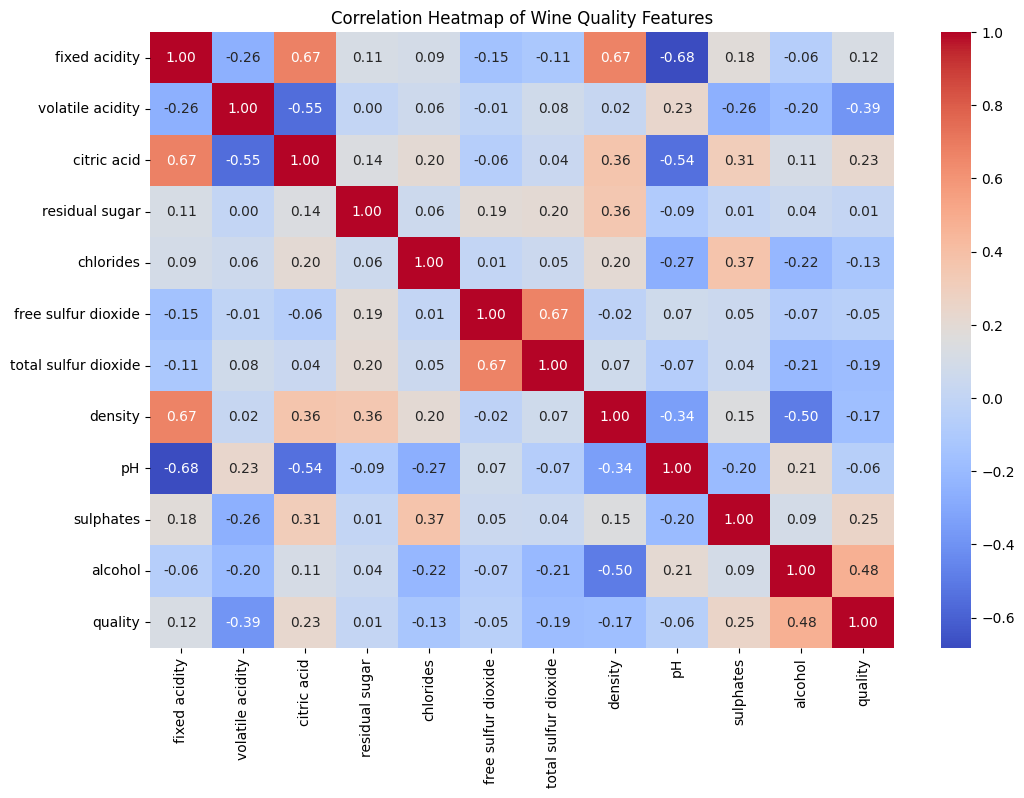

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix to visualize relationships between features
correlation_matrix = wine_data.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Wine Quality Features')
plt.show()


The correlation heatmap above shows the relationships between the different features and the target variable "quality." Notable observations:

1. Alcohol has a positive correlation with quality.
2. Volatile acidity has a negative correlation with quality.
3. Sulphates and citric acid show some positive correlation with quality.


# Step 3

Scale the features and proceed with model selection for predicting wine quality. ​​

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separating features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display scaled feature statistics
scaled_data_description = pd.DataFrame(X_train_scaled, columns=X.columns).describe()
scaled_data_description


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03
mean,-1.111091e-16,4.117981e-16,1.263866e-16,1.527750e-17,3.749932e-17,-7.638751e-17,-7.569308e-17,2.559398e-14,-1.358309e-15,4.152703e-16,4.722137e-16
std,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00
min,-2.160453e+00,-2.291000e+00,-1.394630e+00,-1.153456e+00,-1.550257e+00,-1.442950e+00,-1.234688e+00,-3.613585e+00,-3.713085e+00,-1.661679e+00,-1.917831e+00
25%,-7.099747e-01,-7.285451e-01,-8.827838e-01,-4.567030e-01,-3.538207e-01,-8.609621e-01,-7.487957e-01,-6.031534e-01,-6.602541e-01,-6.303756e-01,-8.724843e-01
50%,-2.458216e-01,-5.892147e-02,-6.383064e-02,-2.476770e-01,-1.713135e-01,-1.819756e-01,-2.629030e-01,1.402550e-02,-1.071561e-02,-2.293130e-01,-2.072638e-01
75%,5.084274e-01,6.107022e-01,8.063071e-01,3.102432e-02,5.175080e-02,4.970108e-01,4.963043e-01,5.773023e-01,5.738691e-01,4.009282e-01,6.480197e-01
max,4.395710e+00,5.856087e+00,3.723828e+00,9.019142e+00,1.059661e+01,5.055920e+00,7.359539e+00,3.727879e+00,4.536054e+00,7.677349e+00,4.259217e+00


The feature scaling is complete, and now the data is ready for model selection. We can implement a few models, such as Logistic Regression, Random Forest, and Decision Tree, to compare their performance. After training, we will evaluate the models using metrics like accuracy and F1-score.



# Step 4

Proceed with model selection and analysis

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit models
log_reg.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = random_forest.predict(X_test_scaled)
y_pred_dt = decision_tree.predict(X_test_scaled)

# Evaluate the models
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
rf_acc = accuracy_score(y_test, y_pred_rf)
dt_acc = accuracy_score(y_test, y_pred_dt)

# Generate classification reports
log_reg_report = classification_report(y_test, y_pred_log_reg)
rf_report = classification_report(y_test, y_pred_rf)
dt_report = classification_report(y_test, y_pred_dt)

log_reg_acc, rf_acc, dt_acc, log_reg_report, rf_report, dt_report


/Users/Sowrab/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Sowrab/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Sowrab/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

(0.575,
 0.659375,
 0.5625,
 '              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       1.00      0.10      0.18        10\n           5       0.63      0.75      0.69       130\n           6       0.54      0.58      0.56       132\n           7       0.39      0.21      0.28        42\n           8       0.00      0.00      0.00         5\n\n    accuracy                           0.57       320\n   macro avg       0.43      0.27      0.28       320\nweighted avg       0.56      0.57      0.55       320\n',
 '              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00        10\n           5       0.71      0.74      0.72       130\n           6       0.63      0.70      0.66       132\n           7       0.64      0.55      0.59        42\n           8       0.00      0.00      0.00         5\n\n    accuracy          

## Model Performance Summary:

### Logistic Regression : 

**Accuracy** : 57.5%

**Key insights** : It has difficulty predicting the lower and higher quality wines (e.g., 3, 8), performing better in the middle range (5-6).

### Random Forest :

**Accuracy** : 65.9% (Best performance among models)

**Key insights** : It performs better across various quality levels, especially for predicting wines with a quality of 5-6, but struggles with rare classes like 3 or 8.

### Decision Tree:
**Accuracy** : 56.2%
**Key insights** : Performs reasonably well in the mid-range (quality 5-6) but has issues with low and high-end wine qualities.

## Model Analysis

Random Forest achieved the highest accuracy of 65.9%, and it was particularly effective in
predicting wine quality levels of 5 and 6. However, the model struggled to predict rarer quality levels
like 3 and 8.


## Conclusion and Recommendations

The Random Forest model provided the best balance of accuracy and robustness for predicting wine quality. Future work could explore more advanced models or perform hyperparameter tuning for even better performance.